In [1]:
from rikai.types import Image
uri1 = 'https://www.rochester.edu/newscenter/wp-content/uploads/2022/03/fea-ukraine-russian-war.jpg'
uri2 = 'https://cdn.britannica.com/84/153184-050-AE228EA5/Poster-Titanic-1912.jpg'
image1 = Image(uri1).to_embedded()
image2 = Image(uri2).to_embedded()

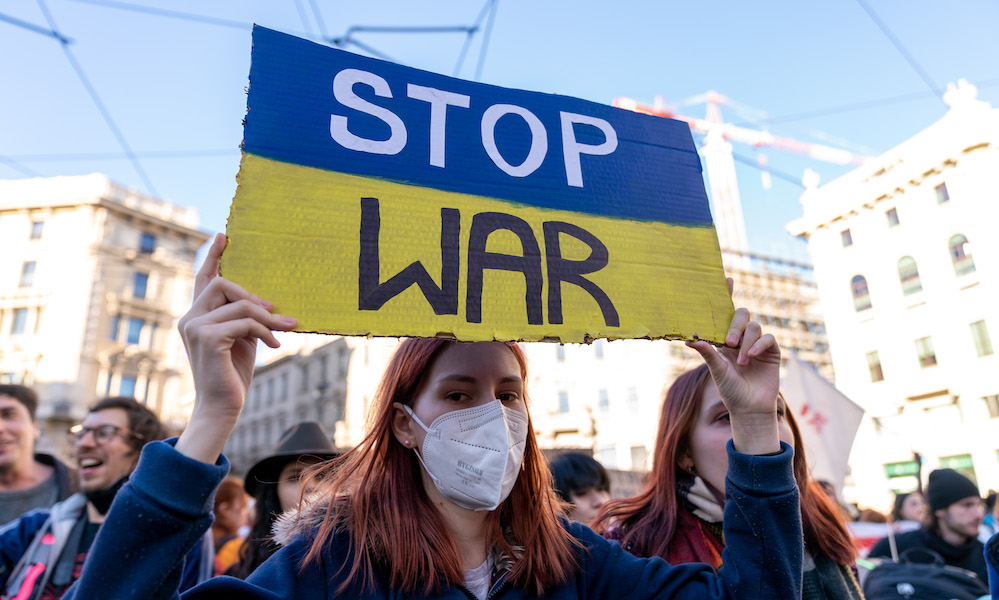

In [2]:
image1.to_pil()

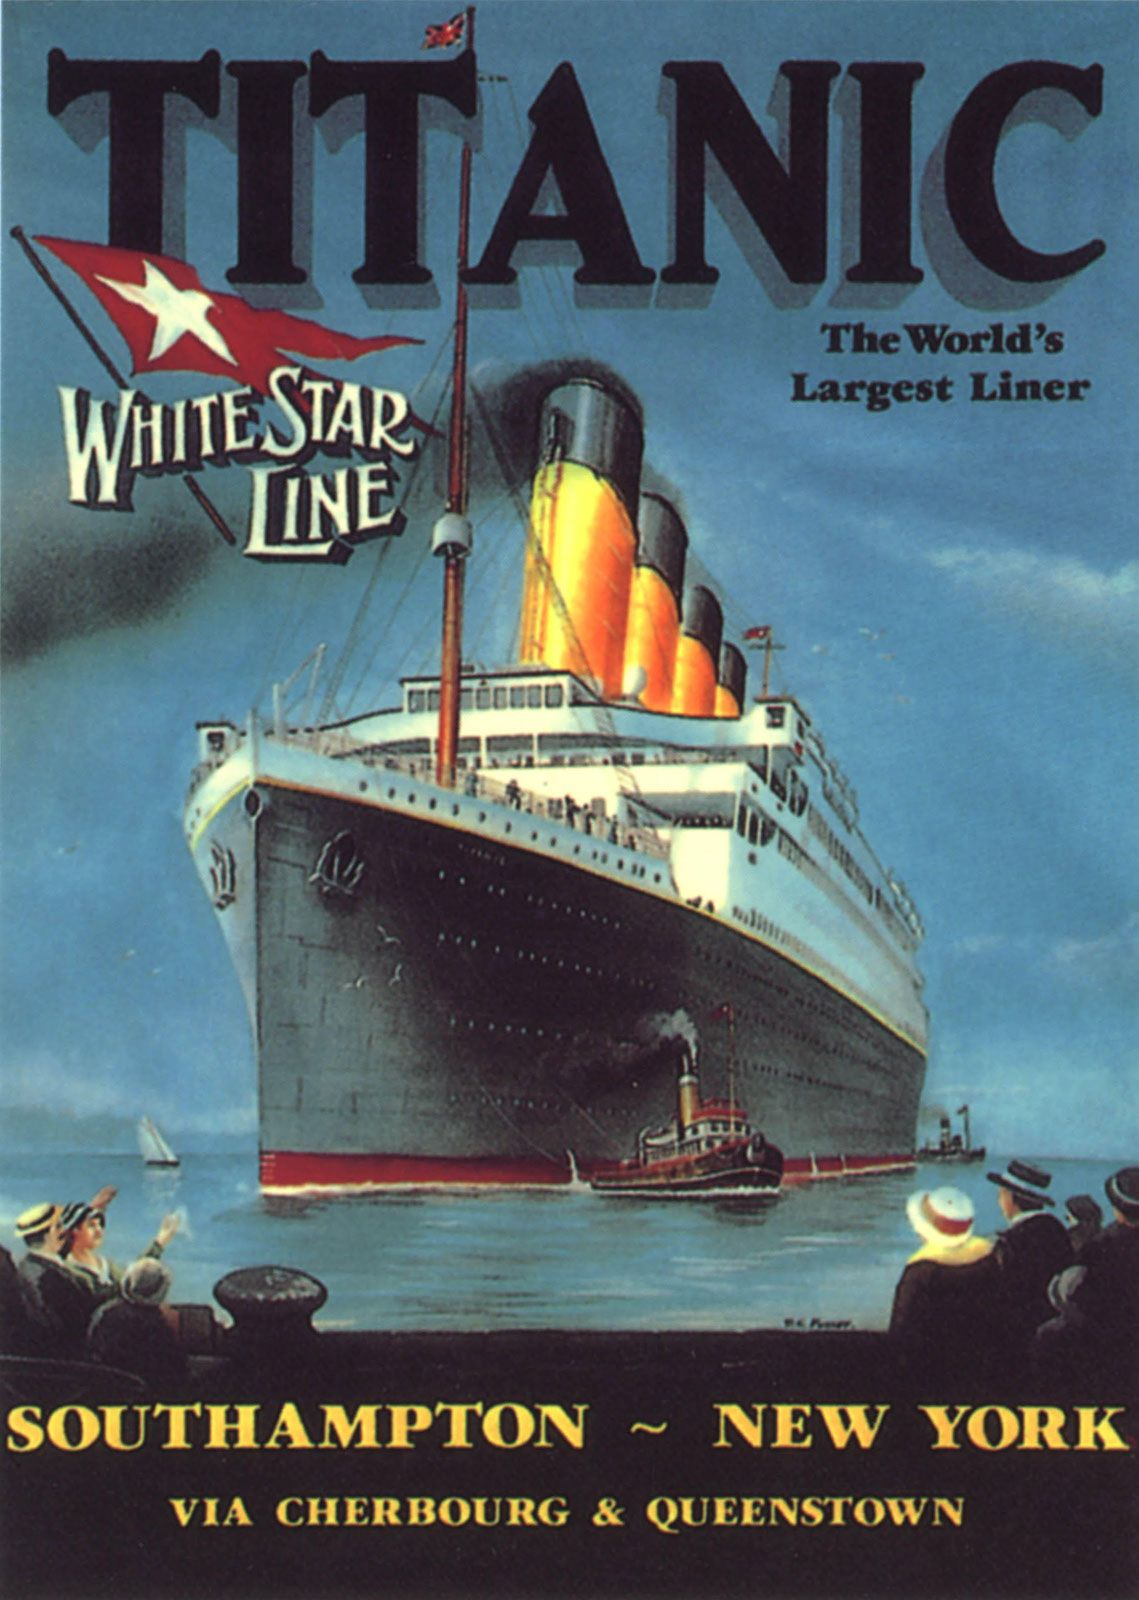

In [3]:
image2.to_pil()

In [5]:
import keras_ocr
pipeline = keras_ocr.pipeline.Pipeline()

images = [image1, image2]
prediction_groups = pipeline.recognize([image.to_numpy() for image in images])

Looking for /Users/da/.keras-ocr/craft_mlt_25k.h5
Looking for /Users/da/.keras-ocr/crnn_kurapan.h5


In [6]:
prediction_groups[0]

[('stop',
  array([[340.50653 ,  63.549664],
         [630.94885 , 119.7643  ],
         [615.007   , 202.13039 ],
         [324.5647  , 145.91576 ]], dtype=float32)),
 ('war',
  array([[372.3992 , 193.9267 ],
         [630.728  , 225.4302 ],
         [616.72156, 340.28308],
         [358.39273, 308.77957]], dtype=float32)),
 ('lel',
  array([[459.17242, 459.06897],
         [486.06897, 469.82758],
         [483.10345, 477.2414 ],
         [456.2069 , 466.4828 ]], dtype=float32))]

In [7]:
from rikai.viz import Text
from rikai.types.geometry import Mask
def convert_pred_groups_for_rikai(pred_groups, shapes):
    result_groups = []
    for i in range(len(pred_groups)):
        pred_group = pred_groups[i]
        shape = shapes[i]
        result_group = []
        for pred in pred_group:
            text = pred[0]
            points = pred[1]
            poly = []
            for point in points:
                poly.append(point[0])
                poly.append(point[1])
            mask = Mask.from_polygon([poly], shape[1], shape[0])
            result = {'text': Text(text, (points[0][0]-10, points[0][1]-10)), 'mask': mask}
            result_group.append(result)
        result_groups.append(result_group)
    return result_groups

shapes = [(image.to_pil().width, image.to_pil().height) for image in images]

result_groups = convert_pred_groups_for_rikai(prediction_groups, shapes)
result_groups[0]

[{'text': <rikai.viz.Text at 0x7fc1b00f9f40>,
  'mask': Mask(type=Type.POLYGON, data=...)},
 {'text': <rikai.viz.Text at 0x7fc1f3bcf9a0>,
  'mask': Mask(type=Type.POLYGON, data=...)},
 {'text': <rikai.viz.Text at 0x7fc1f3d25af0>,
  'mask': Mask(type=Type.POLYGON, data=...)}]

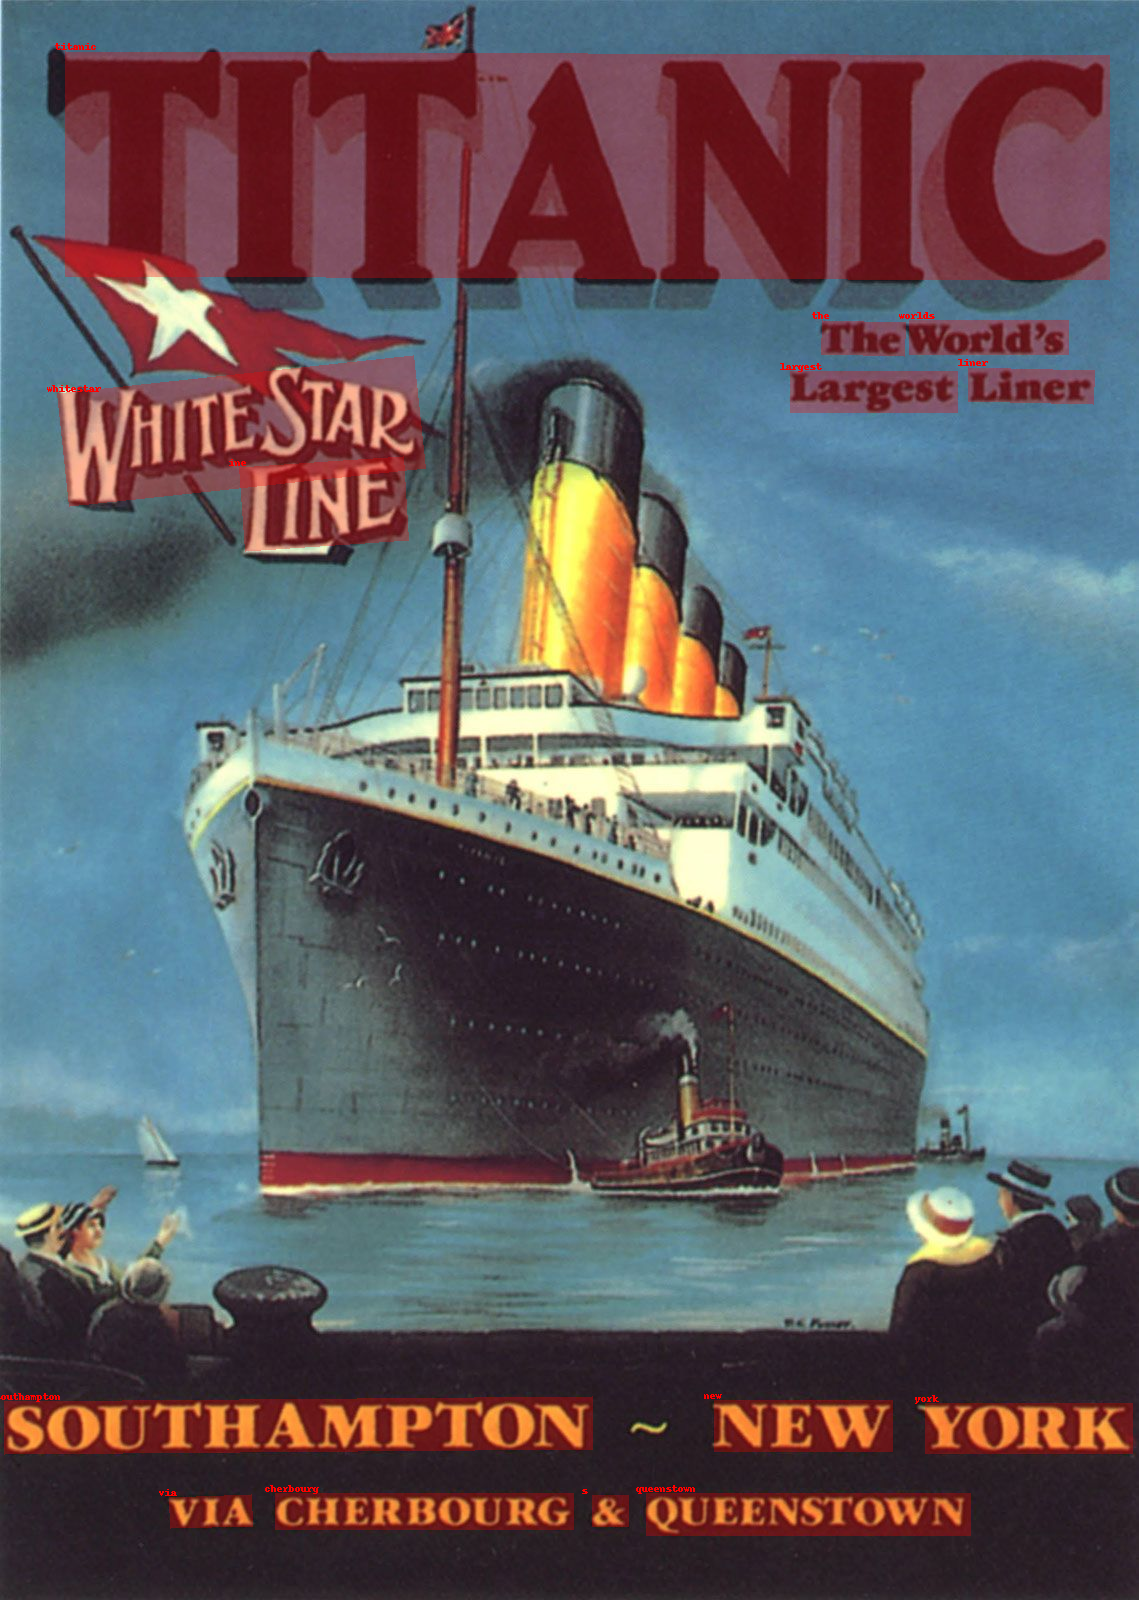

In [8]:
i = 1
ocr_image = images[i]
for result in result_groups[i]:
    ocr_image = ocr_image | result['mask'] | result['text']
ocr_image.to_image().to_pil()